# Data Analysis
## Basic data analysis

In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
# !pip install opendatasets

In [3]:
# import opendatasets as od

In [4]:
# # Downloading data from kaggle
# dataset_url = "https://www.kaggle.com/c/quora-question-pairs/data"
# data_dir = "Data/"

# od.download_kaggle_dataset(dataset_url, data_dir)

In [5]:
import os

os.listdir("/kaggle/input/quora-question-pairs")

['train.csv.zip', 'sample_submission.csv.zip', 'test.csv', 'test.csv.zip']

In [6]:
!unzip "/kaggle/input/quora-question-pairs/train.csv.zip"

Archive:  /kaggle/input/quora-question-pairs/train.csv.zip
  inflating: train.csv               


In [7]:
import pandas as pd

df = pd.read_csv("train.csv")

In [8]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [10]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace = True)

In [11]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [12]:
df.dropna(inplace = True)

In [13]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [10, 4]

The class distribution by counts:
is_duplicate
0    255024
1    149263
Name: count, dtype: int64

The class distribution by percentage:
is_duplicate
0    0.630799
1    0.369201
Name: proportion, dtype: float64



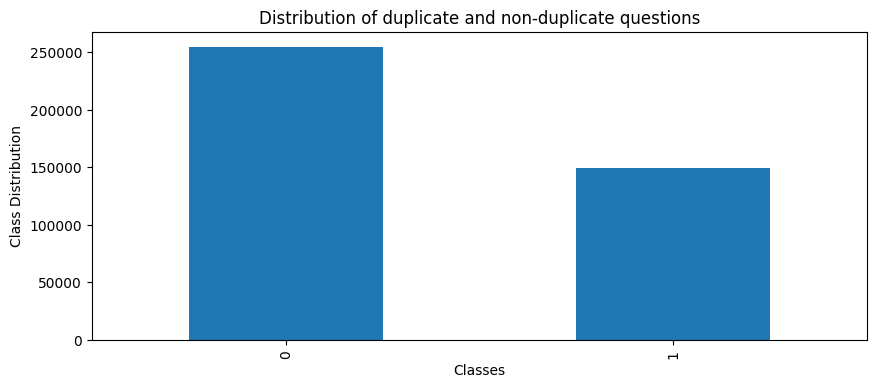

In [16]:
# distribution of duplicate and non-duplicate questions
print(f"The class distribution by counts:\n{df.is_duplicate.value_counts()}\n")
print(f"The class distribution by percentage:\n{df.is_duplicate.value_counts(normalize = True)}\n")

df.is_duplicate.value_counts().plot(kind = "bar", xlabel = "Classes", ylabel = "Class Distribution", title = "Distribution of duplicate and non-duplicate questions");

Observation:
1. The the target feature is_duplicate contains two classes 0 and 1.
2. When calculating the distribution of classes it looks imbalanced class 0 (63%) is more dominating than class 1 (36%).

In [17]:
qid = pd.Series(df.qid1.tolist() + df.qid2.tolist())

print("The number of unique questions:", qid.unique().shape[0])

x = qid.value_counts() > 1
print("The number of repeated questions:", x[x].shape[0])

The number of unique questions: 537929
The number of repeated questions: 111778


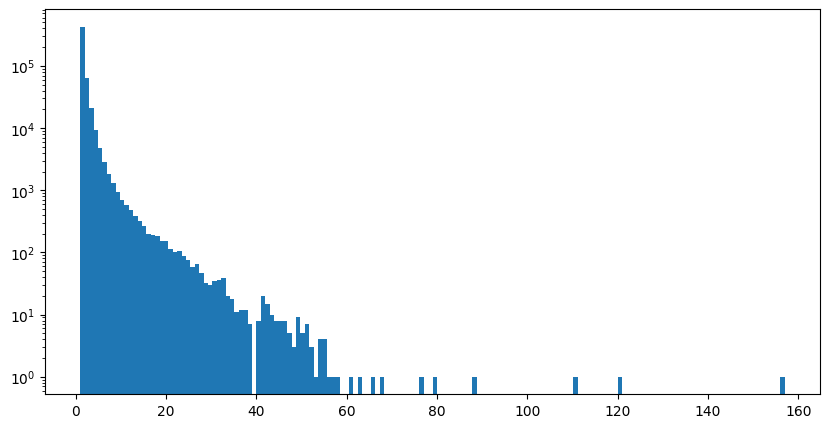

In [18]:
# repeated questions histogram
plt.figure(figsize = (10, 5))
plt.hist(qid.value_counts().values, bins = 160)
plt.yscale("log")
plt.show()

# Text Pre-Processing

In [19]:
import re
from bs4 import BeautifulSoup

def preprocess(q):

    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953

    contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")

    # Removing HTML tags
    q = BeautifulSoup(q, "html.parser").get_text()

    # Remove punctuations using regular expression
    q = re.sub(r'\W+', ' ', q)

    return q

In [20]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already was not done '

# Feature Engineering

In [21]:
df = df.replace([np.inf, -np.inf], np.nan)

In [22]:
sample_data = 400000

new_df = df.sample(sample_data, random_state = 10)

In [23]:
new_df = new_df[["question1", "question2", "is_duplicate"]]

In [24]:
new_df.head()

,question1,question2,is_duplicate
306836,"In the US, rather than raise the minimum wage,...",What is the minimum wage in US. Who all are su...,0
141916,Why is Thailand's total fertility rate so low ...,Why are employment rates in Thailand so low?,0
176531,What does having a bad job mean to you?,Will I be able to get a job an actuary if I ha...,0
55241,What is fast adder and why it is called so?,Picasa: Why is Picasa's picture loading speed ...,0
98694,Should my partner and I just break up?,How do I earn money from a wordpress blog?,0


In [25]:
new_df.dropna(inplace = True)

In [26]:
new_df.loc[:, "question1"] = new_df["question1"].apply(preprocess)
new_df.loc[:, "question2"] = new_df["question2"].apply(preprocess)

In [27]:
new_df.head()

,question1,question2,is_duplicate
306836,in the us rather than raise the minimum wage w...,what is the minimum wage in us who all are sub...,0
141916,why is thailand s total fertility rate so low ...,why are employment rates in thailand so low,0
176531,what does having a bad job mean to you,will i be able to get a job an actuary if i ha...,0
55241,what is fast adder and why it is called so,picasa why is picasa s picture loading speed s...,0
98694,should my partner and i just break up,how do i earn money from a wordpress blog,0


In [28]:
new_df.loc[:, "q1_len"] = new_df.question1.str.len()
new_df.loc[:, "q2_len"] = new_df.question2.str.len()

In [29]:
new_df.loc[:, "q1_num_words"] = new_df["question1"].apply(lambda x: len(x.split(" ")))
new_df.loc[:, "q2_num_words"] = new_df["question2"].apply(lambda x: len(x.split(" ")))

In [30]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
    return len(w1 & w2)

In [31]:
new_df.loc[:, "word_common"] = new_df.apply(common_words, axis = 1)

In [32]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row["question1"].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row["question2"].split(" ")))
    return (len(w1) + len(w2))

In [33]:
new_df.loc[:, "word_total"] = new_df.apply(total_words, axis = 1)

In [34]:
new_df.loc[:, "word_share"] = round(new_df["word_common"]/new_df["word_total"], 2)

In [35]:
import seaborn as sns

sns.set(rc = {"figure.figsize": (11.7, 8.27)})

# Analysis
## Analysis of new features

Minimum words: 1
Maximum words: 603
Average words in a sentence: 59


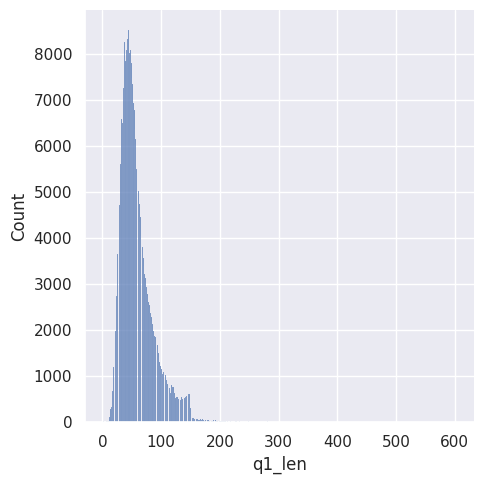

In [36]:
# Analysis of new features

# q1_len
sns.displot(new_df["q1_len"])

print("Minimum words:", new_df.q1_len.min())
print("Maximum words:", new_df.q1_len.max())
print("Average words in a sentence:", int(new_df.q1_len.mean()))

Minimum words: 1
Maximum words: 1141
Average words in a sentence: 59


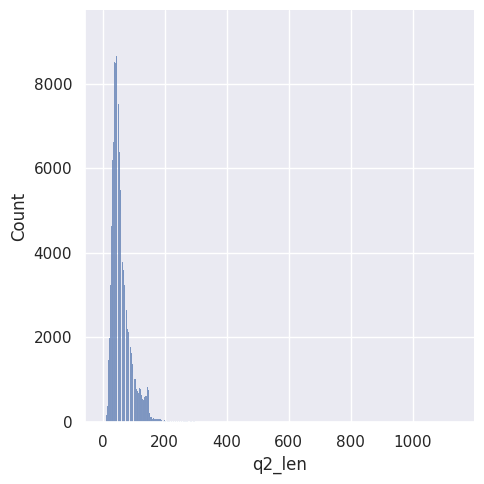

In [37]:
# q2_len
sns.displot(new_df["q2_len"])

print("Minimum words:", new_df.q2_len.min())
print("Maximum words:", new_df.q2_len.max())
print("Average words in a sentence:", int(new_df.q2_len.mean()))

Minimum words: 1
Maximum words: 129
Average num of words in a sentence: 12


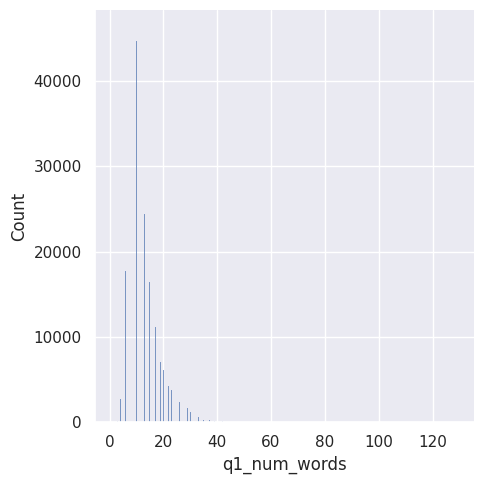

In [38]:
# q1_num_words
sns.displot(new_df["q1_num_words"])

print("Minimum words:", new_df.q1_num_words.min())
print("Maximum words:", new_df.q1_num_words.max())
print("Average num of words in a sentence:", int(new_df.q1_num_words.mean()))

Minimum words: 1
Maximum words: 249
Average num of words in a sentence: 12


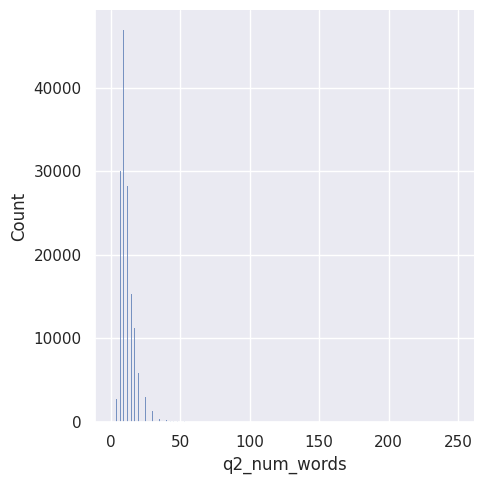

In [39]:
# q2_num_words
sns.displot(new_df["q2_num_words"])

print("Minimum words:", new_df.q2_num_words.min())
print("Maximum words:", new_df.q2_num_words.max())
print("Average num of words in a sentence:", int(new_df.q2_num_words.mean()))

Minimum words: 0
Maximum words: 41
Average common words in a sentence: 6


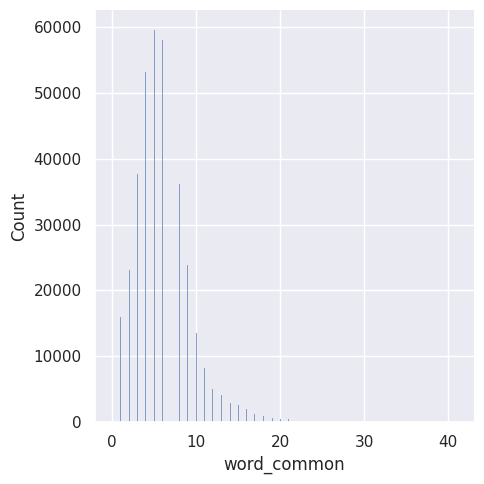

In [40]:
# word_common
sns.displot(new_df["word_common"])

print("Minimum words:", new_df.word_common.min())
print("Maximum words:", new_df.word_common.max())
print("Average common words in a sentence:", int(new_df.word_common.mean()))

Minimum words: 2
Maximum words: 161
Average total words in a sentence: 23


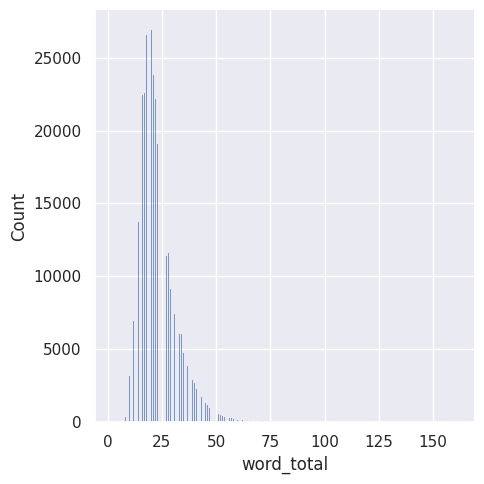

In [41]:
# word_total
sns.displot(new_df["word_total"])

print("Minimum words:", new_df.word_total.min())
print("Maximum words:", new_df.word_total.max())
print("Average total words in a sentence:", int(new_df.word_total.mean()))

Minimum words: 0.0
Maximum words: 0.5
Average word share in a sentence: 0


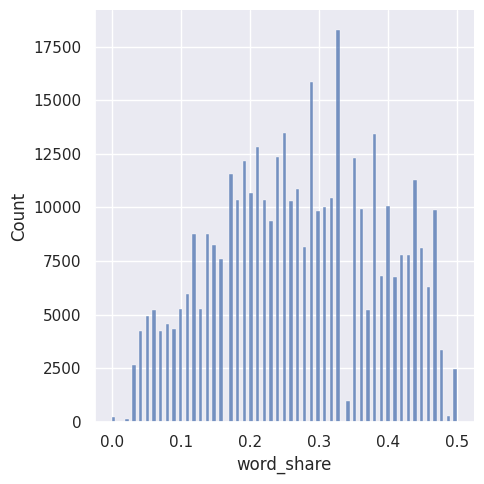

In [42]:
# word_share
sns.displot(new_df["word_share"])

print("Minimum words:", new_df.word_share.min())
print("Maximum words:", new_df.word_share.max())
print("Average word share in a sentence:", int(new_df.word_share.mean()))

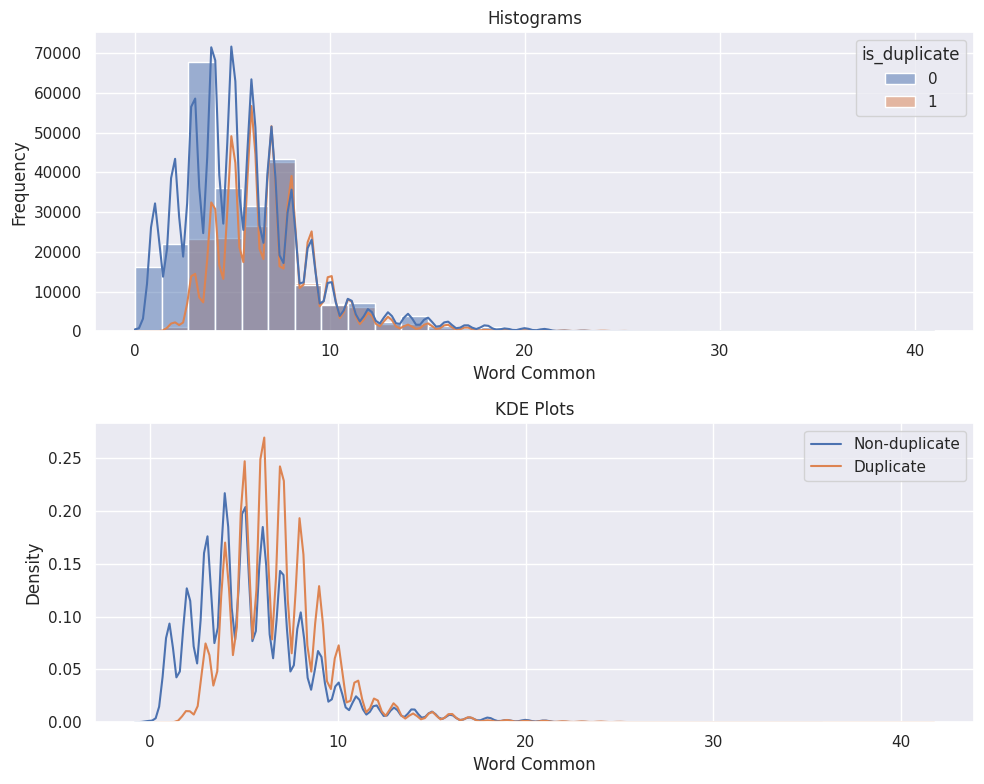

In [43]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize = (10, 8))

# Plot histograms
sns.histplot(data = new_df, x = "word_common", hue = "is_duplicate", ax = axes[0], kde = True, bins=30)

# Plot KDE plots
sns.kdeplot(data=new_df[new_df["is_duplicate"] == 0]["word_common"], ax=axes[1], label = "Non-duplicate")
sns.kdeplot(data=new_df[new_df["is_duplicate"] == 1]["word_common"], ax=axes[1], label = "Duplicate")

# Set titles and labels
axes[0].set_title("Histograms")
axes[1].set_title("KDE Plots")
axes[0].set_xlabel("Word Common")
axes[1].set_xlabel("Word Common")
axes[0].set_ylabel("Frequency")
axes[1].set_ylabel("Density")

# Add legend to KDE plot
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

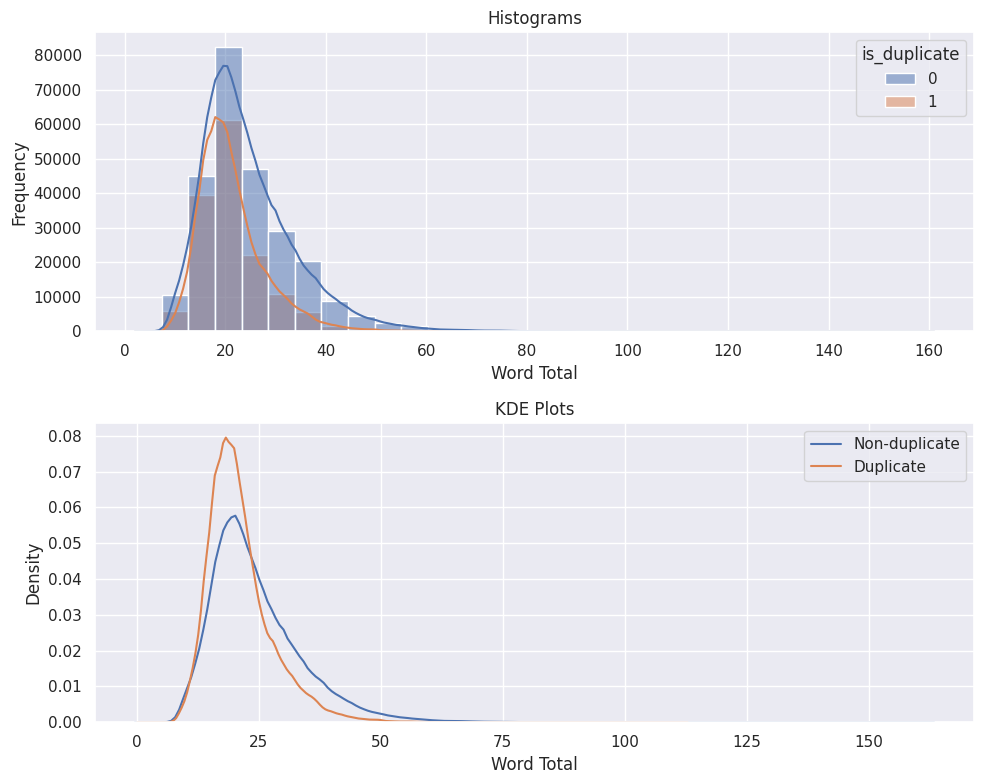

In [44]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize = (10, 8))

# Plot histograms
sns.histplot(data = new_df, x = "word_total", hue = "is_duplicate", ax = axes[0], kde = True, bins=30)

# Plot KDE plots
sns.kdeplot(data=new_df[new_df["is_duplicate"] == 0]["word_total"], ax=axes[1], label = "Non-duplicate")
sns.kdeplot(data=new_df[new_df["is_duplicate"] == 1]["word_total"], ax=axes[1], label = "Duplicate")

# Set titles and labels
axes[0].set_title("Histograms")
axes[1].set_title("KDE Plots")
axes[0].set_xlabel("Word Total")
axes[1].set_xlabel("Word Total")
axes[0].set_ylabel("Frequency")
axes[1].set_ylabel("Density")

# Add legend to KDE plot
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

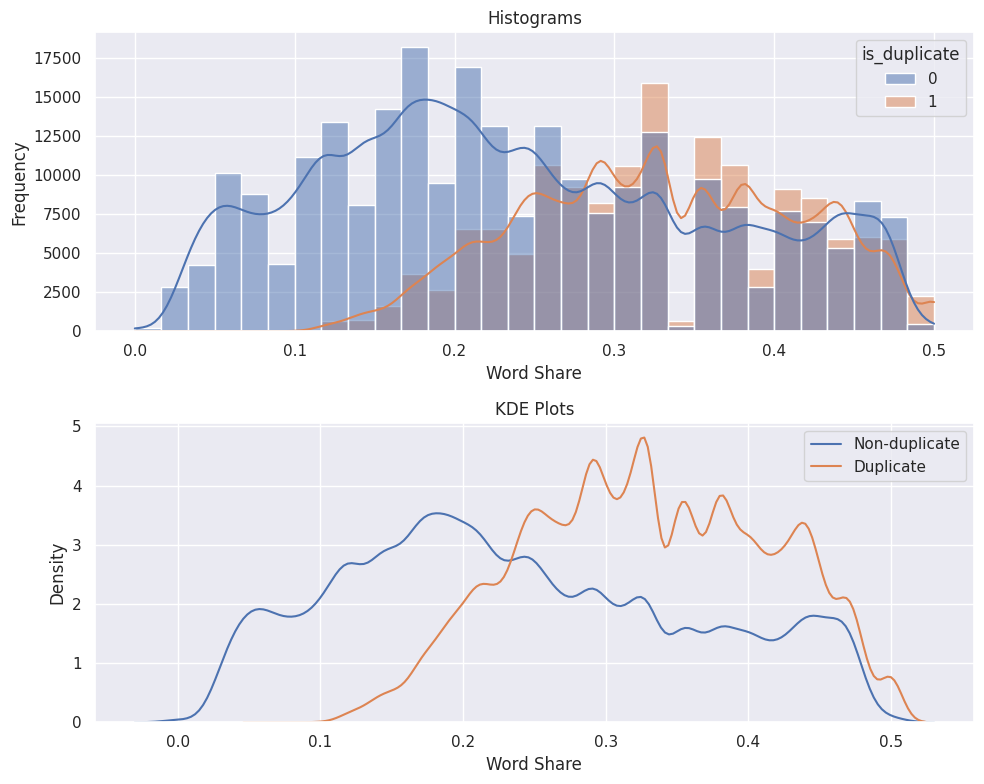

In [45]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize = (10, 8))

# Plot histograms
sns.histplot(data = new_df, x = "word_share", hue = "is_duplicate", ax = axes[0], kde = True, bins=30)

# Plot KDE plots
sns.kdeplot(data=new_df[new_df["is_duplicate"] == 0]["word_share"], ax=axes[1], label = "Non-duplicate")
sns.kdeplot(data=new_df[new_df["is_duplicate"] == 1]["word_share"], ax=axes[1], label = "Duplicate")

# Set titles and labels
axes[0].set_title("Histograms")
axes[1].set_title("KDE Plots")
axes[0].set_xlabel("Word Share")
axes[1].set_xlabel("Word Share")
axes[0].set_ylabel("Frequency")
axes[1].set_ylabel("Density")

# Add legend to KDE plot
axes[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

# Advanced Features

## Creating advanced features to improve model's accuracy

In [46]:
!pip install nltk

In [47]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [48]:
# Advanced Features
from nltk.corpus import stopwords

def fetch_token_features(row):

    q1 = row['question1']
    q2 = row['question2']

    SAFE_DIV = 0.0001

    STOP_WORDS = stopwords.words("english")

    token_features = [0.0]*8

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])

    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])

    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))

    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))

    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))


    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)

    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])

    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])

    return token_features

In [49]:
token_features = new_df.apply(fetch_token_features, axis = 1)

new_df["cwc_min"] = list(map(lambda x: x[0], token_features))
new_df["cwc_max"] = list(map(lambda x: x[1], token_features))
new_df["csc_min"] = list(map(lambda x: x[2], token_features))
new_df["csc_max"] = list(map(lambda x: x[3], token_features))
new_df["ctc_min"] = list(map(lambda x: x[4], token_features))
new_df["ctc_max"] = list(map(lambda x: x[5], token_features))

new_df["last_word_eq"] = list(map(lambda x: x[6], token_features))

new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [50]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
306836,in the us rather than raise the minimum wage w...,what is the minimum wage in us who all are sub...,0,102,83,23,19,7,35,0.20,0.599988,0.333330,0.374995,0.272725,0.333331,0.272726,0.0,0.0
141916,why is thailand s total fertility rate so low ...,why are employment rates in thailand so low,0,50,44,12,9,5,21,0.24,0.499988,0.285710,0.499988,0.499988,0.499994,0.363633,0.0,1.0
176531,what does having a bad job mean to you,will i be able to get a job an actuary if i ha...,0,39,60,10,16,5,25,0.20,0.666644,0.333328,0.333328,0.249997,0.444440,0.266665,0.0,0.0
55241,what is fast adder and why it is called so,picasa why is picasa s picture loading speed s...,0,43,88,11,17,7,25,0.28,0.333322,0.142855,0.833319,0.714276,0.599994,0.374998,0.0,0.0
98694,should my partner and i just break up,how do i earn money from a wordpress blog,0,38,42,9,10,2,19,0.11,0.000000,0.000000,0.199996,0.166664,0.124998,0.111110,0.0,0.0


In [51]:
%pip install Distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for Distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=53168140d4d00521c1aba19122af565f77cda124bbb98be410aa98a093a36db0
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built Distance
Note: you may need to restart the kernel to use updated packages.


In [52]:
import distance

def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))

    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2

    # Compute longest common substring
    strs = list(distance.lcsubstrings(q1, q2))
    if strs:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)

    return length_features

In [53]:
length_features = new_df.apply(fetch_length_features, axis = 1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [54]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
306836,in the us rather than raise the minimum wage w...,what is the minimum wage in us who all are sub...,0,102,83,23,19,7,35,0.20,...,0.333330,0.374995,0.272725,0.333331,0.272726,0.0,0.0,4.0,20.0,0.214286
141916,why is thailand s total fertility rate so low ...,why are employment rates in thailand so low,0,50,44,12,9,5,21,0.24,...,0.285710,0.499988,0.499988,0.499994,0.363633,0.0,1.0,3.0,9.5,0.244444
176531,what does having a bad job mean to you,will i be able to get a job an actuary if i ha...,0,39,60,10,16,5,25,0.20,...,0.333328,0.333328,0.249997,0.444440,0.266665,0.0,0.0,6.0,12.0,0.125000
55241,what is fast adder and why it is called so,picasa why is picasa s picture loading speed s...,0,43,88,11,17,7,25,0.28,...,0.142855,0.833319,0.714276,0.599994,0.374998,0.0,0.0,6.0,13.0,0.181818
98694,should my partner and i just break up,how do i earn money from a wordpress blog,0,38,42,9,10,2,19,0.11,...,0.000000,0.199996,0.166664,0.124998,0.111110,0.0,0.0,1.0,8.5,0.076923


# Fuzzy Features

## Creating fuzzy features using fuzzywuzzy library

In [55]:
!pip install fuzzywuzzy

In [56]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):

    q1 = row['question1']
    q2 = row['question2']

    fuzzy_features = [0.0]*4

    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [57]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis = 1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [58]:
new_df.shape

(400000, 25)

In [59]:
new_df.head()

,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
306836,in the us rather than raise the minimum wage w...,what is the minimum wage in us who all are sub...,0,102,83,23,19,7,35,0.20,...,0.272726,0.0,0.0,4.0,20.0,0.214286,51,55,58,61
141916,why is thailand s total fertility rate so low ...,why are employment rates in thailand so low,0,50,44,12,9,5,21,0.24,...,0.363633,0.0,1.0,3.0,9.5,0.244444,48,48,70,70
176531,what does having a bad job mean to you,will i be able to get a job an actuary if i ha...,0,39,60,10,16,5,25,0.20,...,0.266665,0.0,0.0,6.0,12.0,0.125000,37,49,45,48
55241,what is fast adder and why it is called so,picasa why is picasa s picture loading speed s...,0,43,88,11,17,7,25,0.28,...,0.374998,0.0,0.0,6.0,13.0,0.181818,42,51,43,72
98694,should my partner and i just break up,how do i earn money from a wordpress blog,0,38,42,9,10,2,19,0.11,...,0.111110,0.0,0.0,1.0,8.5,0.076923,41,42,38,41


# Analysis
## Analysis of advanced features

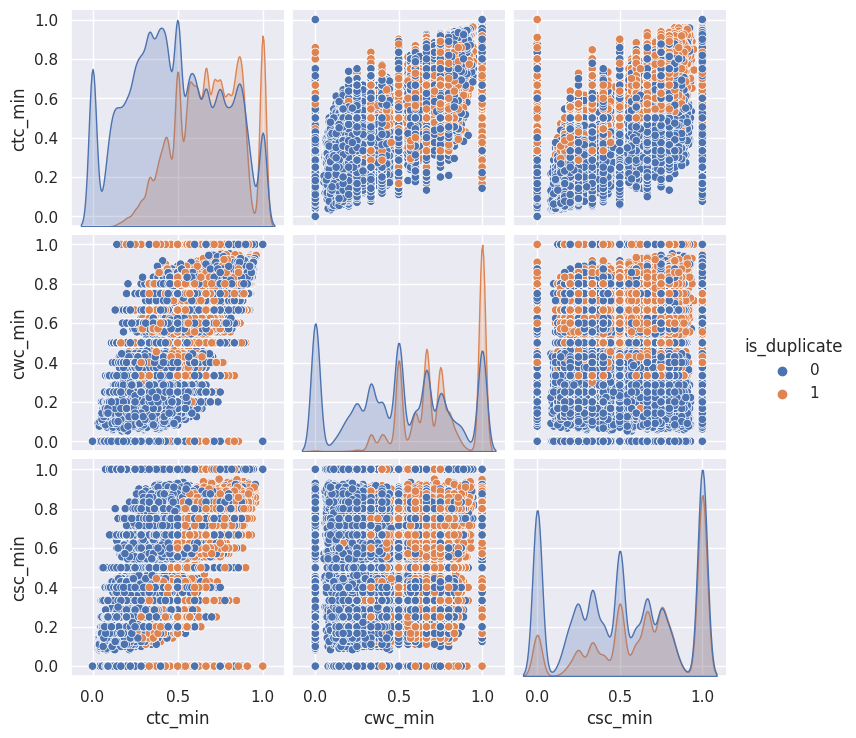

In [60]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']], hue = 'is_duplicate');

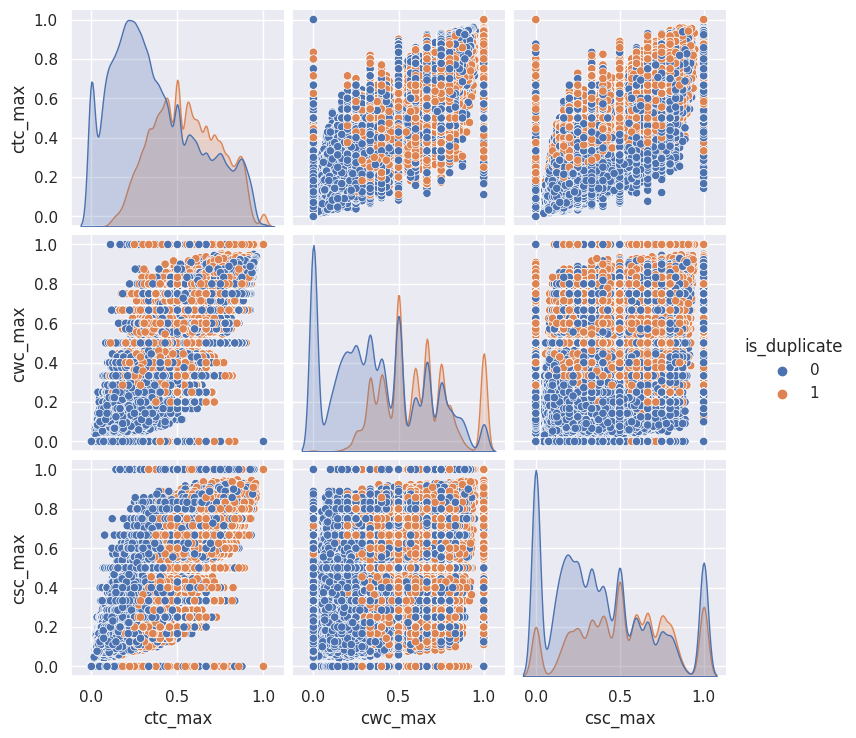

In [61]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']], hue = 'is_duplicate');

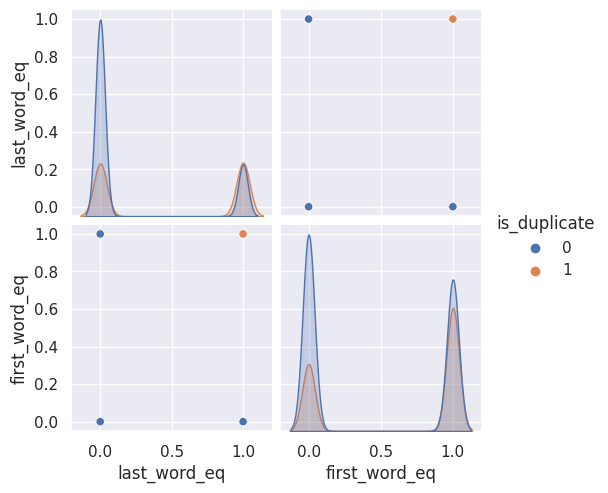

In [62]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']], hue = 'is_duplicate');

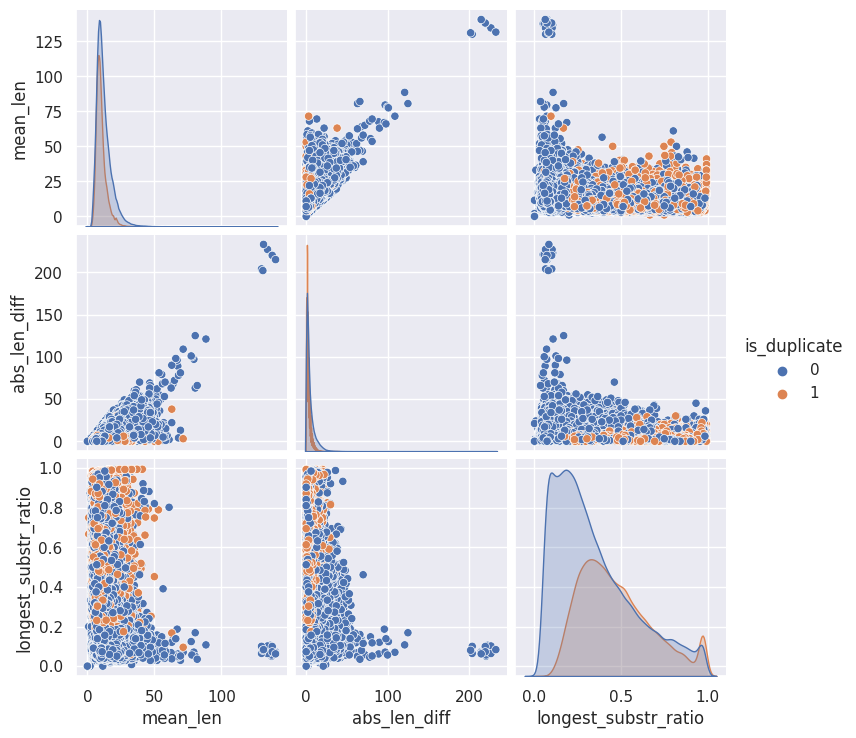

In [63]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']], hue = 'is_duplicate');

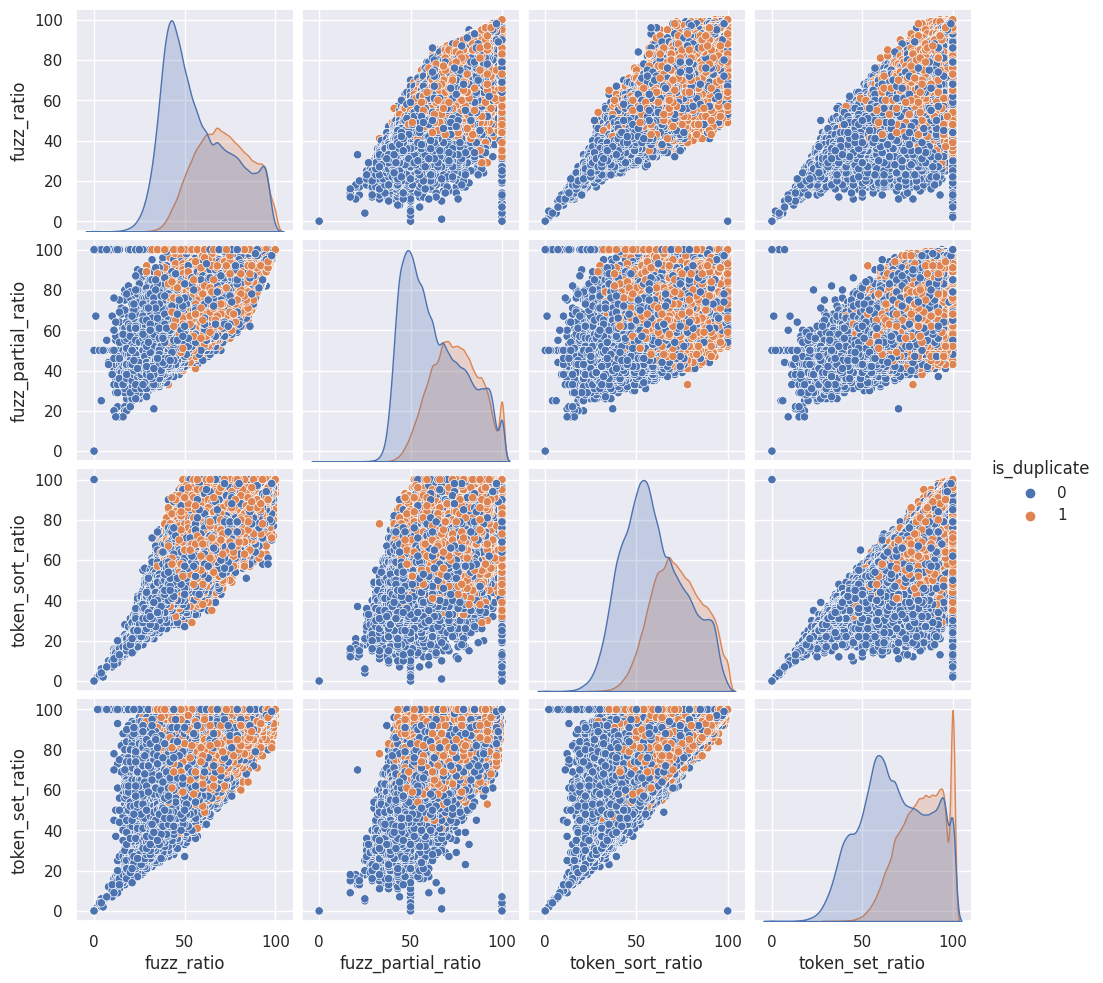

In [64]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']], hue = 'is_duplicate');

In [65]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention
from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [66]:
from sklearn.manifold import TSNE

tsne2d = TSNE(n_components = 2, init = 'random', random_state = 101, method = 'barnes_hut', n_iter = 500, verbose = 2, angle = 0.5).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 400000 samples in 1.687s...
[t-SNE] Computed neighbors for 400000 samples in 571.312s...
[t-SNE] Computed conditional probabilities for sample 1000 / 400000
[t-SNE] Computed conditional probabilities for sample 2000 / 400000
[t-SNE] Computed conditional probabilities for sample 3000 / 400000
[t-SNE] Computed conditional probabilities for sample 4000 / 400000
[t-SNE] Computed conditional probabilities for sample 5000 / 400000
[t-SNE] Computed conditional probabilities for sample 6000 / 400000
[t-SNE] Computed conditional probabilities for sample 7000 / 400000
[t-SNE] Computed conditional probabilities for sample 8000 / 400000
[t-SNE] Computed conditional probabilities for sample 9000 / 400000
[t-SNE] Computed conditional probabilities for sample 10000 / 400000
[t-SNE] Computed conditional probabilities for sample 11000 / 400000
[t-SNE] Computed conditional probabilities for sample 12000 / 400000
[t-SNE] Computed conditional proba

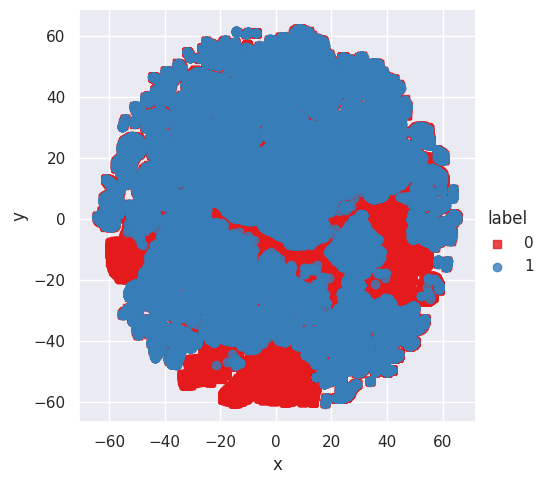

In [67]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data = x_df, x = 'x', y = 'y', hue = 'label', fit_reg = False, palette = "Set1",markers = ['s','o']);

# Model Building
## Applying Machine Learning Algorithms

In [68]:
new_df.isna().sum()

question1               0
question2               0
is_duplicate            0
q1_len                  0
q2_len                  0
q1_num_words            0
q2_num_words            0
word_common             0
word_total              0
word_share              0
cwc_min                 0
cwc_max                 0
csc_min                 0
csc_max                 0
ctc_min                 0
ctc_max                 0
last_word_eq            0
first_word_eq           0
abs_len_diff            0
mean_len                0
longest_substr_ratio    0
fuzz_ratio              0
fuzz_partial_ratio      0
token_sort_ratio        0
token_set_ratio         0
dtype: int64

In [69]:
new_df.dropna(inplace = True)

In [70]:
final_df = new_df[[feature for feature in new_df.columns if feature not in ["question1", "question2"]]]

In [71]:
final_df

,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
306836,0,102,83,23,19,7,35,0.20,0.599988,0.333330,...,0.272726,0.0,0.0,4.0,20.0,0.214286,51,55,58,61
141916,0,50,44,12,9,5,21,0.24,0.499988,0.285710,...,0.363633,0.0,1.0,3.0,9.5,0.244444,48,48,70,70
176531,0,39,60,10,16,5,25,0.20,0.666644,0.333328,...,0.266665,0.0,0.0,6.0,12.0,0.125000,37,49,45,48
55241,0,43,88,11,17,7,25,0.28,0.333322,0.142855,...,0.374998,0.0,0.0,6.0,13.0,0.181818,42,51,43,72
98694,0,38,42,9,10,2,19,0.11,0.000000,0.000000,...,0.111110,0.0,0.0,1.0,8.5,0.076923,41,42,38,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104750,0,61,52,10,11,1,21,0.05,0.000000,0.000000,...,0.000000,0.0,0.0,1.0,9.5,0.075472,44,45,42,42
95121,0,50,113,9,26,1,33,0.03,0.000000,0.000000,...,0.000000,0.0,0.0,17.0,16.5,0.058824,35,46,34,35
253863,0,42,31,9,6,6,15,0.40,0.999950,0.999950,...,0.624992,1.0,0.0,3.0,6.5,0.375000,68,79,85,100
159898,0,54,54,12,12,3,23,0.13,0.000000,0.000000,...,0.181817,0.0,0.0,0.0,11.0,0.072727,42,45,45,46


In [72]:
import numpy as np

In [73]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np

# Merge questions
questions = list(new_df.question1) + list(new_df.question2)

# Train Word2Vec model on your text data
sentences = [word_tokenize(q) for q in questions]
word2vec_model = Word2Vec(sentences, vector_size = 300, window = 10, min_count = 5, workers = 4)

# Function to convert a text into its Word2Vec embedding
def text_to_w2v_embedding(text):
    tokens = word_tokenize(text)
    embeddings = [word2vec_model.wv[token] for token in tokens if token in word2vec_model.wv]
    if embeddings:
        return np.mean(embeddings, axis=0)  # Average the word embeddings to get a single vector representation
    else:
        return np.zeros(word2vec_model.vector_size)  # Return zeros if no embeddings are found

# Convert questions to Word2Vec embeddings
word2vec_embeddings = [text_to_w2v_embedding(q) for q in questions]

# Split the embeddings into q1_arr and q2_arr
embedding_dim = word2vec_model.vector_size
num_samples = len(new_df)
q1_arr, q2_arr = np.array(word2vec_embeddings[:num_samples]), np.array(word2vec_embeddings[num_samples:])

In [74]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# # merge questions
# questions = list(new_df.question1) + list(new_df.question2)

# tfidf = TfidfVectorizer(max_features = 4000)
# q1_arr, q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(), 2)

In [75]:
q1_arr.shape

(400000, 300)

In [76]:
q2_arr.shape

(400000, 300)

In [77]:
temp_df1 = pd.DataFrame(q1_arr, index = new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = new_df.index)

temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(400000, 600)

In [78]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
306836,0.625784,0.075917,-0.244642,0.584973,0.175376,0.042628,0.144606,-0.589667,-0.499290,-0.227942,...,0.299405,-0.092564,-0.592914,-0.041215,-0.140902,0.461329,0.324942,0.501446,0.444923,-0.102943
141916,0.463291,0.412418,-0.215789,0.929006,0.162912,0.339510,0.219209,-0.110860,-0.301305,-0.144514,...,-0.312821,0.290684,0.123768,-0.333150,-0.254716,0.474458,0.594319,0.204723,0.832001,-0.491422
176531,-0.108954,0.147317,-0.341089,0.748587,-0.428320,0.103624,0.931933,-0.652102,-0.468125,-0.115615,...,0.648433,0.146294,-0.392023,0.046321,0.065335,0.428232,-0.193015,0.337153,-0.416199,0.404710
55241,0.306346,0.697265,-0.370445,0.385756,0.263942,-0.346851,0.362996,0.186901,-0.077068,-0.125421,...,-0.208098,0.405192,0.172226,0.505790,0.307759,0.702525,-0.041876,0.362259,0.169449,-0.582180
98694,0.389778,0.085890,-0.530325,0.815423,0.009739,-0.284622,0.184430,-0.417352,-0.202075,0.146974,...,0.053220,-0.175991,-0.052563,-0.006093,0.208314,0.980563,0.221215,0.168174,-0.759844,0.493722


In [79]:
# temp_df["is_duplicate"] = new_df["is_duplicate"]

In [80]:
final_df = pd.concat([temp_df, final_df], axis = 1)
final_df.shape

(400000, 623)

In [81]:
final_df.head()

,0,1,2,3,4,5,6,7,8,9,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
306836,0.625784,0.075917,-0.244642,0.584973,0.175376,0.042628,0.144606,-0.589667,-0.499290,-0.227942,...,0.272726,0.0,0.0,4.0,20.0,0.214286,51,55,58,61
141916,0.463291,0.412418,-0.215789,0.929006,0.162912,0.339510,0.219209,-0.110860,-0.301305,-0.144514,...,0.363633,0.0,1.0,3.0,9.5,0.244444,48,48,70,70
176531,-0.108954,0.147317,-0.341089,0.748587,-0.428320,0.103624,0.931933,-0.652102,-0.468125,-0.115615,...,0.266665,0.0,0.0,6.0,12.0,0.125000,37,49,45,48
55241,0.306346,0.697265,-0.370445,0.385756,0.263942,-0.346851,0.362996,0.186901,-0.077068,-0.125421,...,0.374998,0.0,0.0,6.0,13.0,0.181818,42,51,43,72
98694,0.389778,0.085890,-0.530325,0.815423,0.009739,-0.284622,0.184430,-0.417352,-0.202075,0.146974,...,0.111110,0.0,0.0,1.0,8.5,0.076923,41,42,38,41


In [82]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(

    final_df.loc[:, final_df.columns != "is_duplicate"].values,
    final_df.loc[:, "is_duplicate"].values,
    test_size = 0.2,
    random_state = 10
    )

In [83]:
x_train.shape, y_train.shape

((320000, 622), (320000,))

In [84]:
x_test.shape, y_test.shape

((80000, 622), (80000,))

In [85]:
x_train

array([[-1.87905014e-01, -4.68089283e-01, -2.08182171e-01, ...,
         9.80000000e+01,  9.90000000e+01,  9.90000000e+01],
       [ 1.86054140e-01, -4.91330683e-01, -5.62850118e-01, ...,
         9.00000000e+01,  7.70000000e+01,  8.70000000e+01],
       [ 7.90128261e-02,  9.96529698e-01, -1.30547002e-01, ...,
         7.90000000e+01,  8.60000000e+01,  9.20000000e+01],
       ...,
       [ 3.69991481e-01,  6.62689567e-01,  8.39021727e-02, ...,
         6.60000000e+01,  7.30000000e+01,  7.30000000e+01],
       [-2.56554112e-02,  3.02006700e-03,  4.83724147e-01, ...,
         4.60000000e+01,  4.60000000e+01,  5.10000000e+01],
       [-4.53584492e-02,  9.96210575e-01, -1.69700056e-01, ...,
         6.60000000e+01,  7.70000000e+01,  9.50000000e+01]])

In [86]:
y_train

array([1, 0, 0, ..., 0, 0, 0])

In [87]:
x_test

array([[ 6.08352542e-01, -3.94831866e-01, -9.55215693e-02, ...,
         8.10000000e+01,  7.80000000e+01,  9.30000000e+01],
       [ 4.35883999e-01, -3.64492148e-01,  1.10198148e-01, ...,
         8.50000000e+01,  7.70000000e+01,  8.30000000e+01],
       [-1.87147260e-02, -5.43326065e-02,  3.58370245e-02, ...,
         7.00000000e+01,  6.60000000e+01,  8.20000000e+01],
       ...,
       [ 3.61266136e-01,  5.62590659e-01, -2.17852890e-01, ...,
         3.90000000e+01,  3.50000000e+01,  3.80000000e+01],
       [ 4.96995866e-01, -2.01667741e-01, -3.69079798e-01, ...,
         8.30000000e+01,  8.40000000e+01,  8.90000000e+01],
       [ 4.55699265e-01,  3.05600092e-02, -2.37613440e-01, ...,
         5.90000000e+01,  5.70000000e+01,  6.10000000e+01]])

In [88]:
y_test

array([1, 0, 1, ..., 0, 1, 0])

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# creating an object of RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 200, n_jobs = -1)

# Training a model
rf.fit(x_train, y_train)

# Predicting
y_pred = rf.predict(x_test)

# Calculating model's accuracy score
accuracy_score(y_test, y_pred)

0.8368

In [90]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[44405  6183]
 [ 6873 22539]]


<Axes: >

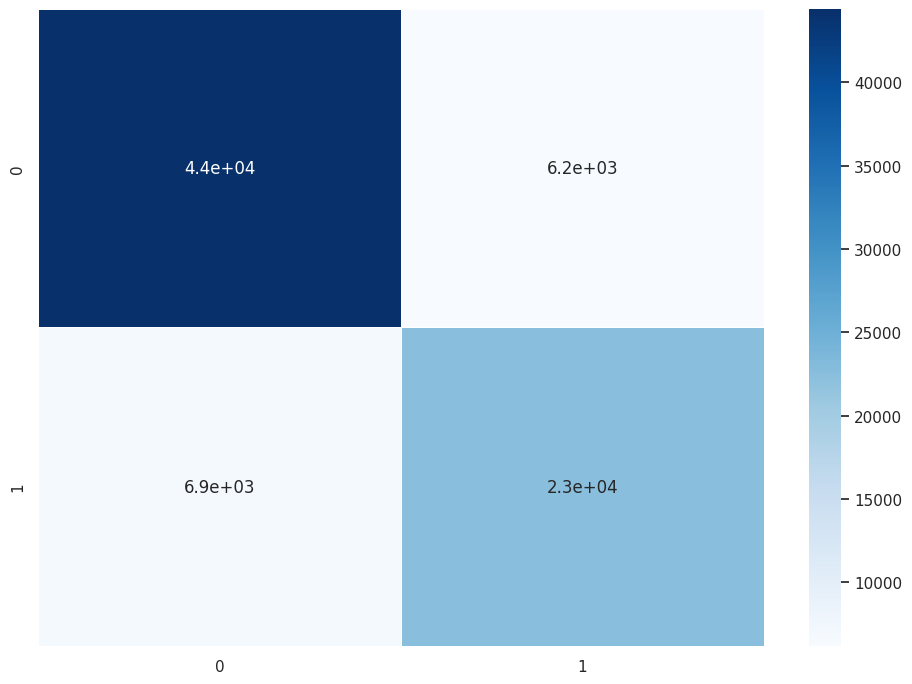

In [91]:
sns.heatmap(cm , annot = True, cmap = "Blues", linewidth = .5)

In [92]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.87      0.88      0.87     50588
           1       0.78      0.77      0.78     29412

    accuracy                           0.84     80000
   macro avg       0.83      0.82      0.82     80000
weighted avg       0.84      0.84      0.84     80000



## XGBoost Classifier



In [93]:
!pip install xgboost

In [94]:
from xgboost import XGBClassifier

# creating an object of XGBClassifier
xgb = XGBClassifier(n_estimators = 200, n_jobs = -1)

# Training a model
xgb.fit(x_train, y_train)

# Predicting
y_pred = xgb.predict(x_test)

# Calculating model's accuracy score
accuracy_score(y_test, y_pred)

0.835425

In [95]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[44081  6507]
 [ 6659 22753]]


<Axes: >

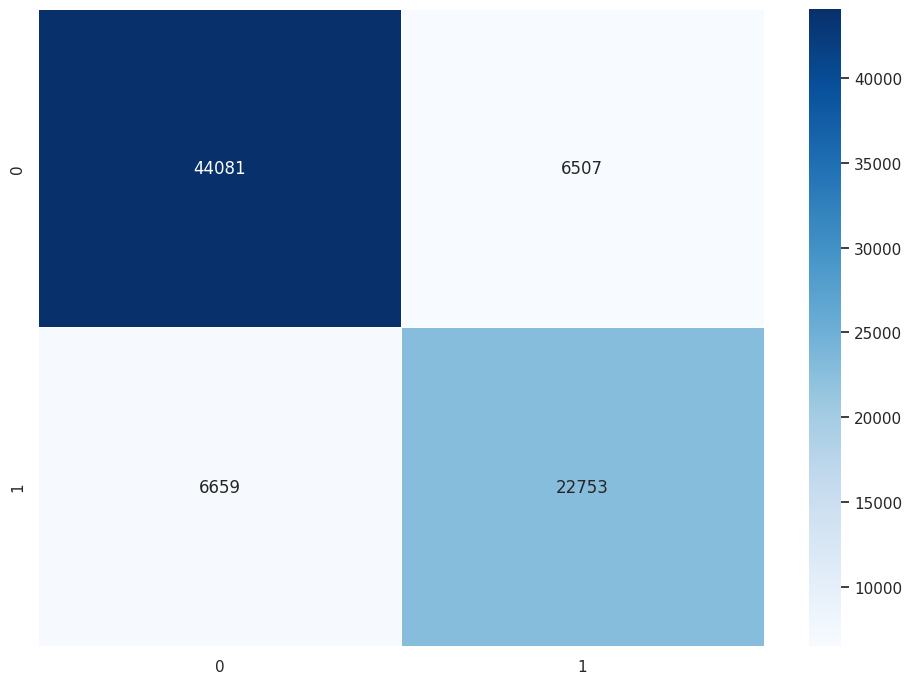

In [96]:
sns.heatmap(cm , annot = True, cmap = "Blues", linewidth = .5, fmt = ".0f")

In [97]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87     50588
           1       0.78      0.77      0.78     29412

    accuracy                           0.84     80000
   macro avg       0.82      0.82      0.82     80000
weighted avg       0.84      0.84      0.84     80000



In [98]:
# from sklearn.svm import SVC

# sv = SVC()

# sv.fit(x_train, y_train)

# y_pred = sv.predict(x_test)

# accuracy_score(y_test, y_pred)

## Logistic Regression

In [99]:
from sklearn.linear_model import LogisticRegression

# creating an object of LogisticRegression
lr = LogisticRegression(max_iter = 3500)

# Training a model
lr.fit(x_train, y_train)

# Predicting
y_pred = lr.predict(x_test)

# Calculating model's accuracy score
accuracy_score(y_test, y_pred)

0.7686375

In [100]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[42406  8182]
 [10327 19085]]


<Axes: >

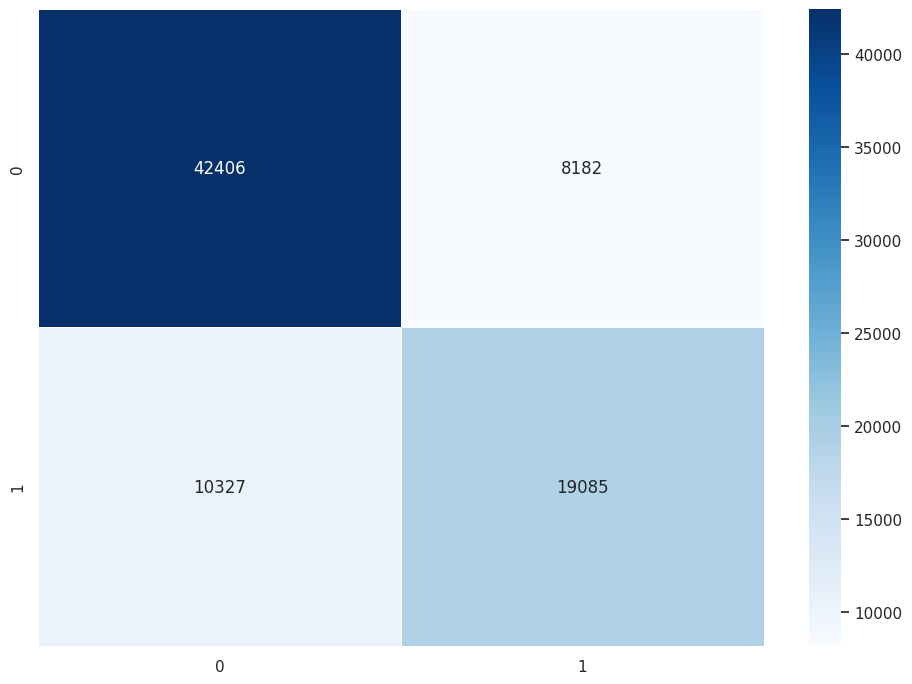

In [101]:
sns.heatmap(cm , annot = True, cmap = "Blues", linewidth = .5, fmt = ".0f")

## K Nearset Neighbors - KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier

# creating an object of KNeighborsClassifier
knn = KNeighborsClassifier()

# Training a model
knn.fit(x_train, y_train)

# Predicting
y_pred = knn.predict(x_test)

# Calculating model's accuracy score
accuracy_score(y_test, y_pred)

0.76595

In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[42319  8269]
 [10455 18957]]


<Axes: >

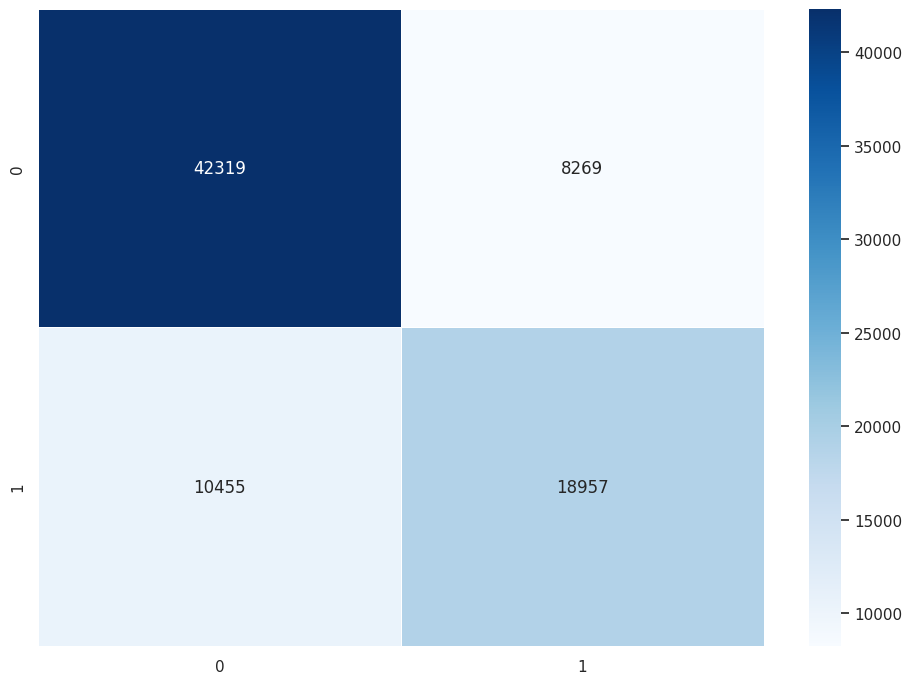

In [104]:
sns.heatmap(cm , annot = True, cmap = "Blues", linewidth = .5, fmt = ".0f")

In [105]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82     50588
           1       0.70      0.64      0.67     29412

    accuracy                           0.77     80000
   macro avg       0.75      0.74      0.74     80000
weighted avg       0.76      0.77      0.76     80000



## Naive Bayes

In [106]:
from sklearn.naive_bayes import GaussianNB

# creating an object of NaiveBayes
nb = GaussianNB()

# Training a model
nb.fit(x_train, y_train)

# Predicting
y_pred = nb.predict(x_test)

# Calculating model's accuracy score
accuracy_score(y_test, y_pred)

0.701475

In [107]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[36313 14275]
 [ 9607 19805]]


<Axes: >

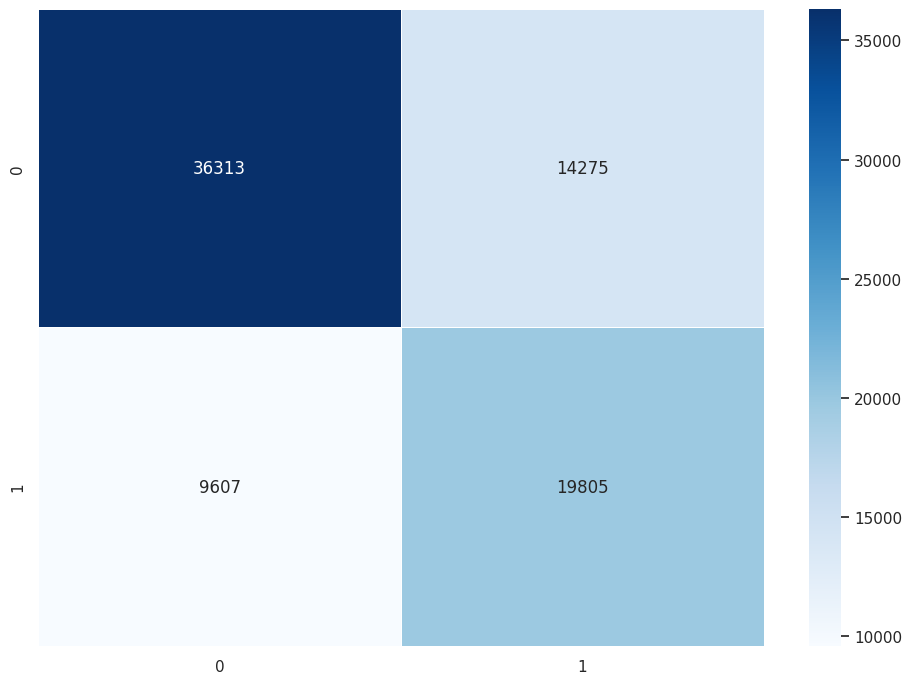

In [108]:
sns.heatmap(cm , annot = True, cmap = "Blues", linewidth = .5, fmt = ".0f")

In [109]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.79      0.72      0.75     50588
           1       0.58      0.67      0.62     29412

    accuracy                           0.70     80000
   macro avg       0.69      0.70      0.69     80000
weighted avg       0.71      0.70      0.71     80000



# Model Evaluation

In [110]:
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Instantiate classifier objects
# rf_classifier = RandomForestClassifier()
# xgb_classifier = XGBClassifier()
# lr_classifier = LogisticRegression()
# knn_classifier = KNeighborsClassifier()
# nb_classifier = GaussianNB()

# # Create a list of classifiers
# algorithms = [rf_classifier, xgb_classifier, lr_classifier, knn_classifier, nb_classifier]

# for algorithm in algorithms:
#     x_train, x_test, y_train, y_test = train_test_split(
#         final_df.loc[:, final_df.columns != "is_duplicate"].values,
#         final_df.loc[:, "is_duplicate"].values,
#         test_size=0.2,
#         random_state=10
#     )

#     algorithm.fit(x_train, y_train)

#     y_pred = algorithm.predict(x_test)

#     # Calculate and print accuracy score
#     accuracy = accuracy_score(y_test, y_pred)
#     print(f"{'Summary':-^100}")
#     print("\nAccuracy Score for {}: {:.4f}\n".format(algorithm.__class__.__name__, accuracy))

#     # Calculate confusion matrix
#     cm = confusion_matrix(y_test, y_pred)

#     # Print confusion matrix
#     print("Confusion Matrix for {}: \n".format(algorithm.__class__.__name__))
#     print(cm)

#     # Calculate classification report
#     cr = classification_report(y_test, y_pred)

#     # Print classification report
#     print("\nClassification Report for {}: \n".format(algorithm.__class__.__name__))
#     print(cr)
#     print(f"{'':-^100}\n")

In [111]:
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# # Instantiate classifier objects
# rf_classifier = RandomForestClassifier(n_estimators = 200)
# xgb_classifier = XGBClassifier()
# lr_classifier = LogisticRegression(max_iter = 5000)
# knn_classifier = KNeighborsClassifier()
# nb_classifier = GaussianNB()

# # Create a list of classifiers
# algorithms = [rf_classifier, xgb_classifier, lr_classifier, knn_classifier, nb_classifier]

# # Define batch size
# batch_size = 10000

# # Initialize variables to store results for the last batch
# last_batch_accuracy = {}
# last_batch_cm = {}
# last_batch_cr = {}

# # Loop over batches
# for i in range(0, len(final_df), batch_size):
#     print(f"Processing batch {i // batch_size + 1}...")
#     batch_df = final_df.iloc[i:i+batch_size]

#     for algorithm in algorithms:
#         x_train, x_test, y_train, y_test = train_test_split(
#             batch_df.loc[:, batch_df.columns != "is_duplicate"].values,
#             batch_df.loc[:, "is_duplicate"].values,
#             test_size=0.2,
#             random_state=10
#         )

#         algorithm.fit(x_train, y_train)

#         y_pred = algorithm.predict(x_test)

#         # Calculate and store accuracy score for last batch
#         last_batch_accuracy[algorithm.__class__.__name__] = accuracy_score(y_test, y_pred)

#         # Calculate confusion matrix for last batch
#         last_batch_cm[algorithm.__class__.__name__] = confusion_matrix(y_test, y_pred)

#         # Calculate classification report for last batch
#         last_batch_cr[algorithm.__class__.__name__] = classification_report(y_test, y_pred)

# # Print final results for the last batch
# for algorithm in algorithms:
#     print(f"{'Final Results for Last Batch':-^100}")
#     print("\nAccuracy Score for {} (Last Batch): {:.4f}\n".format(algorithm.__class__.__name__, last_batch_accuracy[algorithm.__class__.__name__]))

#     print("Confusion Matrix for {} (Last Batch): \n".format(algorithm.__class__.__name__))
#     print(last_batch_cm[algorithm.__class__.__name__])

#     print("\nClassification Report for {} (Last Batch): \n".format(algorithm.__class__.__name__))
#     print(last_batch_cr[algorithm.__class__.__name__])
#     print(f"{'':-^100}\n")

# Functions

In [112]:
def test_common_words(q1, q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return len(w1 & w2)

In [113]:
def test_total_words(q1, q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))
    return (len(w1) + len(w2))

In [114]:
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [115]:
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [116]:
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0] * 4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [117]:
# def query_point_creator(q1,q2):
    
#     input_query = []
    
#     # preprocess
#     q1 = preprocess(q1)
#     q2 = preprocess(q2)
    
#     # fetch basic features
#     input_query.append(len(q1))
#     input_query.append(len(q2))
    
#     input_query.append(len(q1.split(" ")))
#     input_query.append(len(q2.split(" ")))
    
#     input_query.append(test_common_words(q1,q2))
#     input_query.append(test_total_words(q1,q2))
#     input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
#     # fetch token features
#     token_features = test_fetch_token_features(q1,q2)
#     input_query.extend(token_features)
    
#     # fetch length based features
#     length_features = test_fetch_length_features(q1,q2)
#     input_query.extend(length_features)
    
#     # fetch fuzzy features
#     fuzzy_features = test_fetch_fuzzy_features(q1,q2)
#     input_query.extend(fuzzy_features)
    
#     # bow feature for q1
#     q1_bow = tfidf.transform([q1]).toarray()
    
#     # bow feature for q2
#     q2_bow = tfidf.transform([q2]).toarray()
    
#     return np.hstack((np.array(input_query).reshape(1,22), q1_bow, q2_bow))

In [118]:
def query_point_creator(q1, q2, word2vec_model):
    input_query = []
    
    # Preprocess
    q1 = preprocess(q1)
    q2 = preprocess(q2)
    
    # Fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1, q2))
    input_query.append(test_total_words(q1, q2))
    input_query.append(round(test_common_words(q1, q2) / test_total_words(q1, q2), 2))
    
    # Fetch token features
    token_features = test_fetch_token_features(q1, q2)
    input_query.extend(token_features)
    
    # Fetch length based features
    length_features = test_fetch_length_features(q1, q2)
    input_query.extend(length_features)
    
    # Fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1, q2)
    input_query.extend(fuzzy_features)
    
    # Compute Word2Vec embeddings for q1
    q1_embeddings = [word2vec_model.wv[word] for word in q1.split() if word in word2vec_model.wv]
    q1_embedding_avg = np.mean(q1_embeddings, axis=0) if q1_embeddings else np.zeros(word2vec_model.vector_size)
    input_query = np.concatenate((input_query, q1_embedding_avg), axis=None)
    
    # Compute Word2Vec embeddings for q2
    q2_embeddings = [word2vec_model.wv[word] for word in q2.split() if word in word2vec_model.wv]
    q2_embedding_avg = np.mean(q2_embeddings, axis=0) if q2_embeddings else np.zeros(word2vec_model.vector_size)
    input_query = np.concatenate((input_query, q2_embedding_avg), axis=None)
    
    return np.array(input_query).reshape(1, -1)

In [119]:
q1 = "Which city serves as the capital of India?"
q2 = "Which city serves as the business capital of India?"

rf.predict(query_point_creator(q1, q2, word2vec_model))

array([0])

In [120]:
import pickle


# Save the RandomForest model
with open('/kaggle/working/model.pkl', 'wb') as f:
    pickle.dump(rf, f)

# Save the Word2Vec model
word2vec_model.save("/kaggle/working/word2vec_model.bin")

# Save the Word2Vec embeddings
np.save("/kaggle/working/word2vec_embeddings.npy", word2vec_embeddings)

In [121]:
import os

os.listdir("/kaggle/working")

['__notebook__.ipynb',
 'train.csv',
 'word2vec_embeddings.npy',
 'word2vec_model.bin',
 'model.pkl']